In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

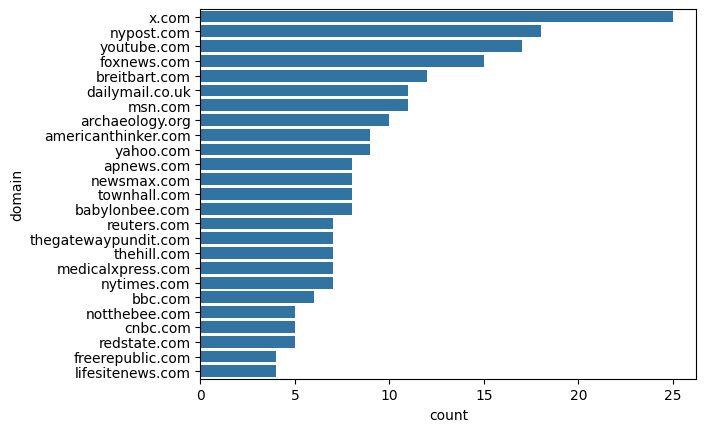

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

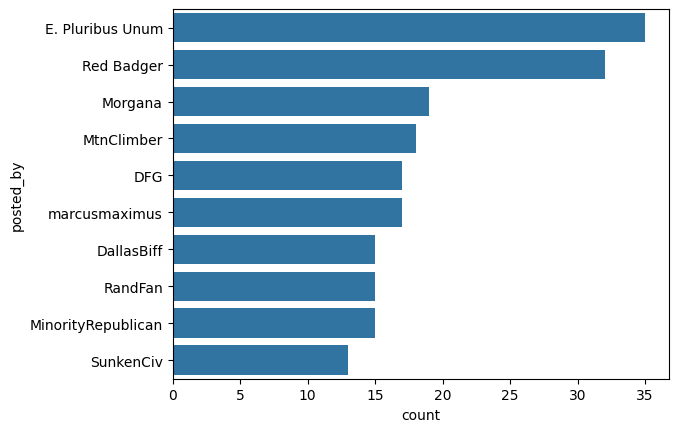

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_145978/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain                                 
                                        count unique                  top freq
domain              posted_by                                                 
americanthinker.com E. Pluribus Unum        3      1  americanthinker.com    3
                    MtnClimber              5      1  americanthinker.com    5
apnews.com          E. Pluribus Unum        3      1           apnews.com    3
                    DallasBiff              1      1           apnews.com    1
archaeology.org     SunkenCiv              10      1      archaeology.org   10
babylonbee.com      DFG                     2      1       babylonbee.com    2
breitbart.com       DFG                     2      1        breitbart.com    2
                    Morgana                 1      1        breitbart.com    1
                    Red Badger              1      1        breitbart.com    1
cnbc.com            MinorityRepublican      1      1             cnbc.com    1
dailymail.co.uk     DFG                     1      1      dailymail.co.uk    1
                    Morgana                 5      1      dailymail.co.uk    5
                    MinorityRepublican      1      1      dailymail.co.uk    1
                    marcusmaximus           1      1      dailymail.co.uk    1
msn.com             DallasBiff              1      1              msn.com    1
                    marcusmaximus           1      1              msn.com    1
                    RandFan                 2      1              msn.com    2
notthebee.com       Red Badger              5      1        notthebee.com    5
nypost.com          MtnClimber              1      1           nypost.com    1
                    DFG                     1      1           nypost.com    1
nytimes.com         E. Pluribus Unum        4      1          nytimes.com    4
redstate.com        DFG                     1      1         redstate.com    1
reuters.com         E. Pluribus Unum        4      1          reuters.com    4
                    MinorityRepublican      1      1          reuters.com    1
                    marcusmaximus           2      1          reuters.com    2
thehill.com         MinorityRepublican      1      1          thehill.com    1
                    RandFan                 4      1          thehill.com    4
townhall.com        E. Pluribus Unum        1      1         townhall.com    1
x.com               DFG                     5      1                x.com    5
                    Red Badger              3      1                x.com    3
                    RandFan                 2      1                x.com    2
yahoo.com           DallasBiff              2      1            yahoo.com    2
                    Morgana                 1      1            yahoo.com    1
                    Red Badger              1      1            yahoo.com    1
youtube.com         SunkenCiv               3      1          youtube.com    3
                    Morgana                 2      1          youtube.com    2

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_145978/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
